## 1 - Import Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import sklearn
import scipy


sns.set()

## 2 - Reading Data

In this section:

2.1 Reading Data

2.2 Understanding the Data

2.3 Checking for missing values

### 2.1 - Reading Data

In [2]:
data = pd.read_csv('kaggle_diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


### 2.2 - Understanding data

In [4]:
data.shape

(2000, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [52]:
data['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

**Data distribution- through histogram**

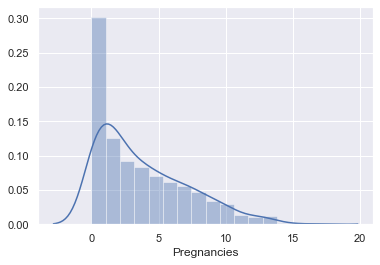

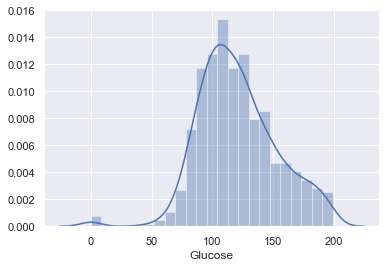

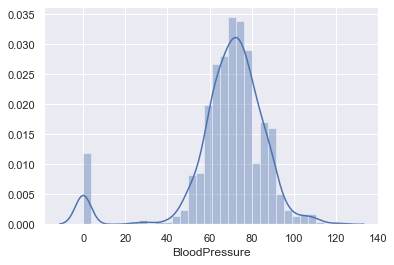

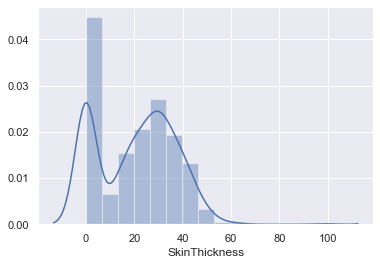

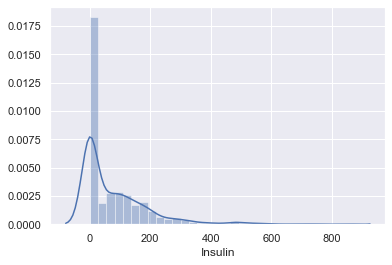

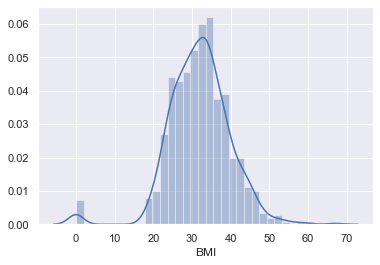

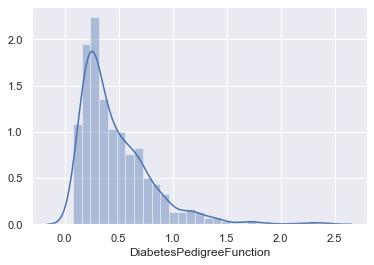

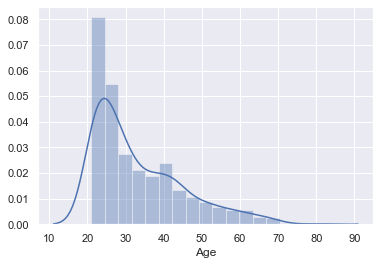

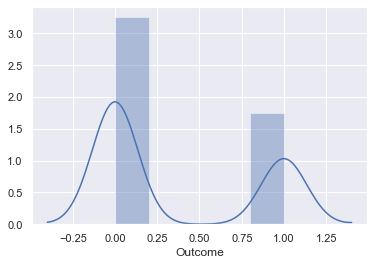

In [7]:
data_feature = data.columns

for feature in data_feature:
    p = sns.distplot(a = data[feature])
    plt.show()

In [19]:
#### Univariate analysis

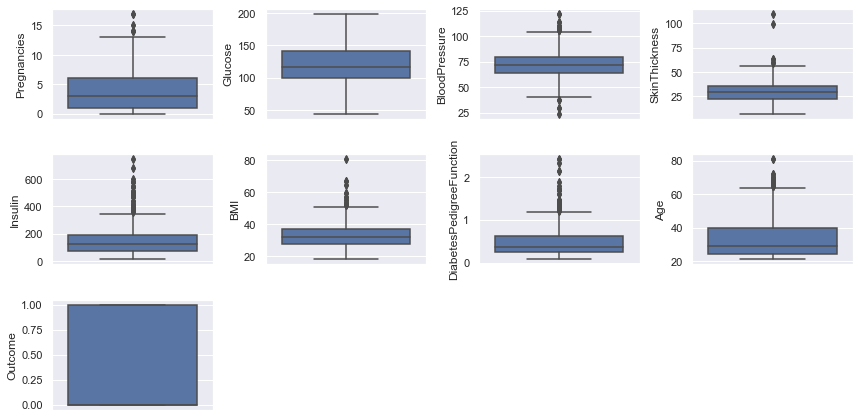

In [18]:
fig = plt.figure(figsize=(12,18))
for i in range(len(data.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=data.iloc[:,i])

plt.tight_layout()
plt.show()

#### Bivariate analysis

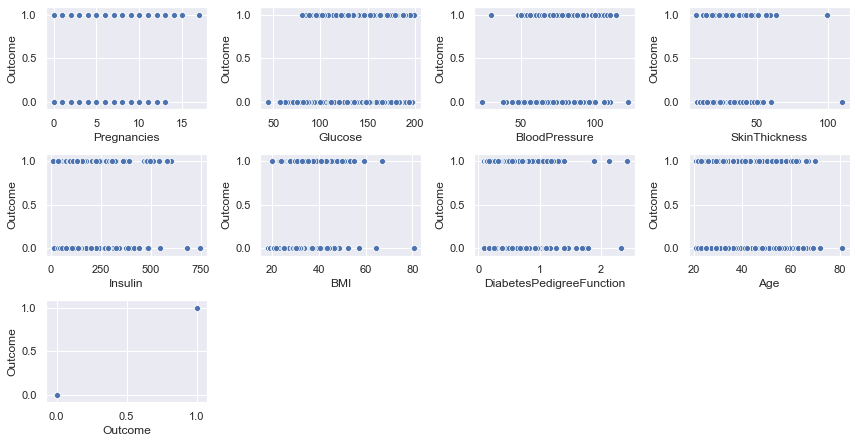

In [21]:
fig = plt.figure(figsize=(12,18))
for i in range(len(data.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(data.iloc[:, i],data['Outcome'])
plt.tight_layout()
plt.show()

### 2.3 - checking for missing values

In [11]:
data.isnull().sum()  # Data has no nan values but has many zeroes

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Removal of Zeros**\
\
Since there are many zeros in data and values of 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' cannot be zero,
Therefore, Converriting Zeros into NaN value

In [12]:
data_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [13]:
data[data_zeros] = np.where((data[data_zeros] == 0), np.nan, data[data_zeros])

In [14]:
data.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

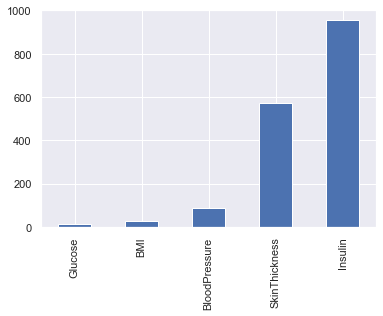

In [15]:
#missing values
missing = data.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

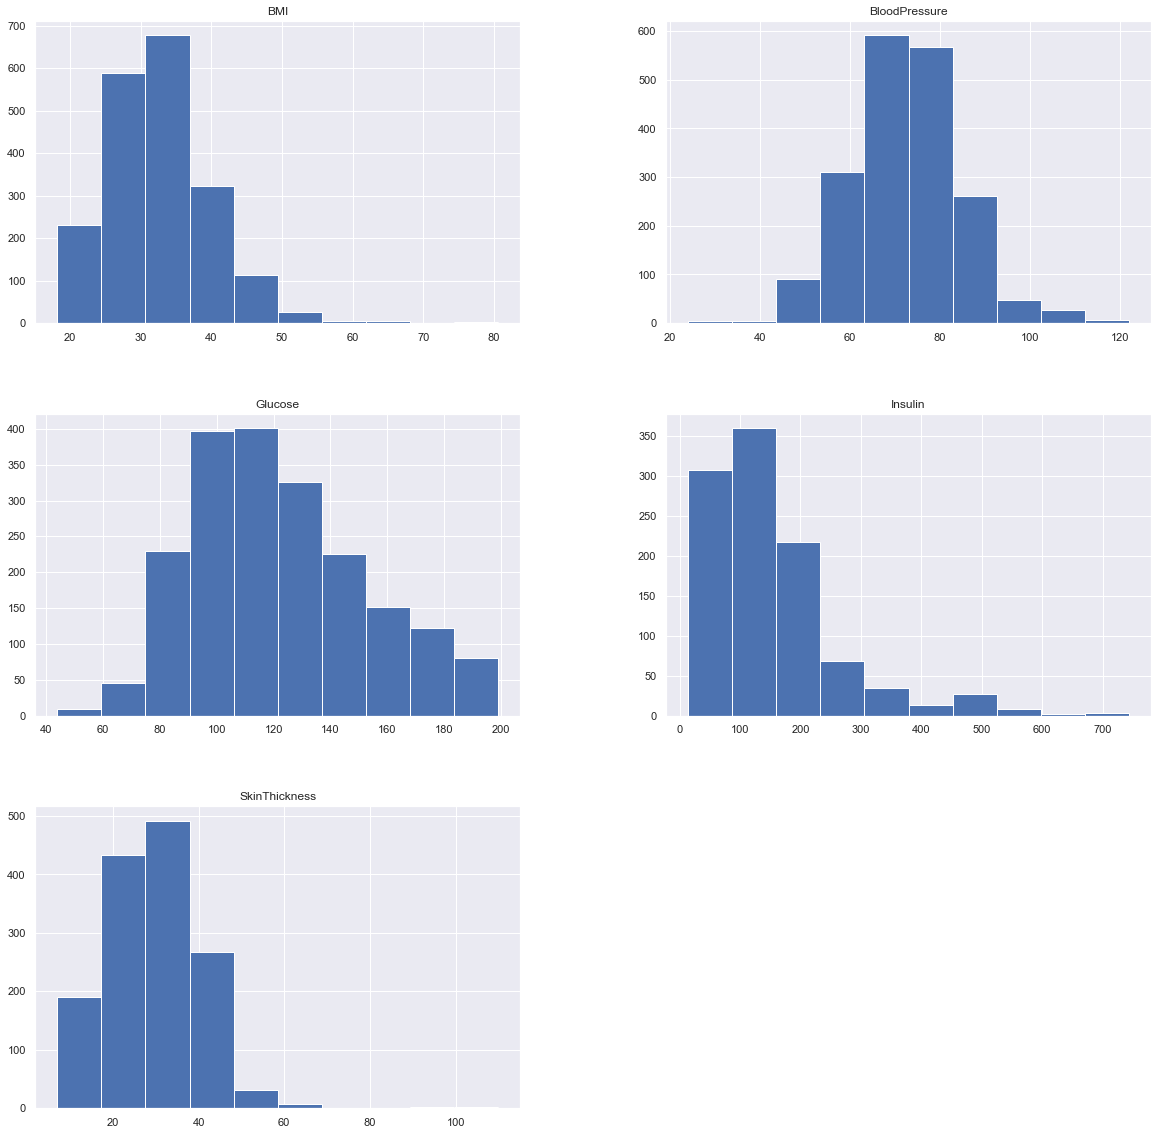

In [17]:
#for feature in data_zeros:
#     plt.hist(data[feature])
#     plt.show()
p = data[data_zeros].hist(figsize = (20,20))

### 3 - Data processing

### 3.1 - Handling Missing Values

Filling NaN values with suitable mean or median values

In [22]:
data['Glucose'] = data['Glucose'].fillna(data['Glucose'].mean())

In [23]:
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].mean())

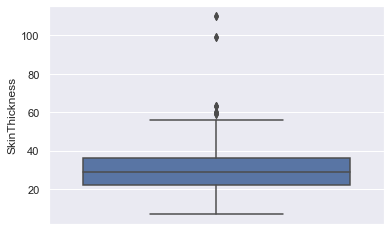

In [24]:
sns.boxplot(y = 'SkinThickness', data = data)

In [25]:
data['SkinThickness'].mean(), data['SkinThickness'].median() 

(29.34127540294324, 29.0)

In [26]:
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())

In [27]:
data['Insulin'].mean(), data['Insulin'].median() 

(153.74329501915707, 126.0)

In [28]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())

In [29]:
data['BMI'].mean(), data['BMI'].median() 

(32.650101419878276, 32.4)

In [30]:
data['BMI'] = data['BMI'].fillna(data['BMI'].median())

In [31]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

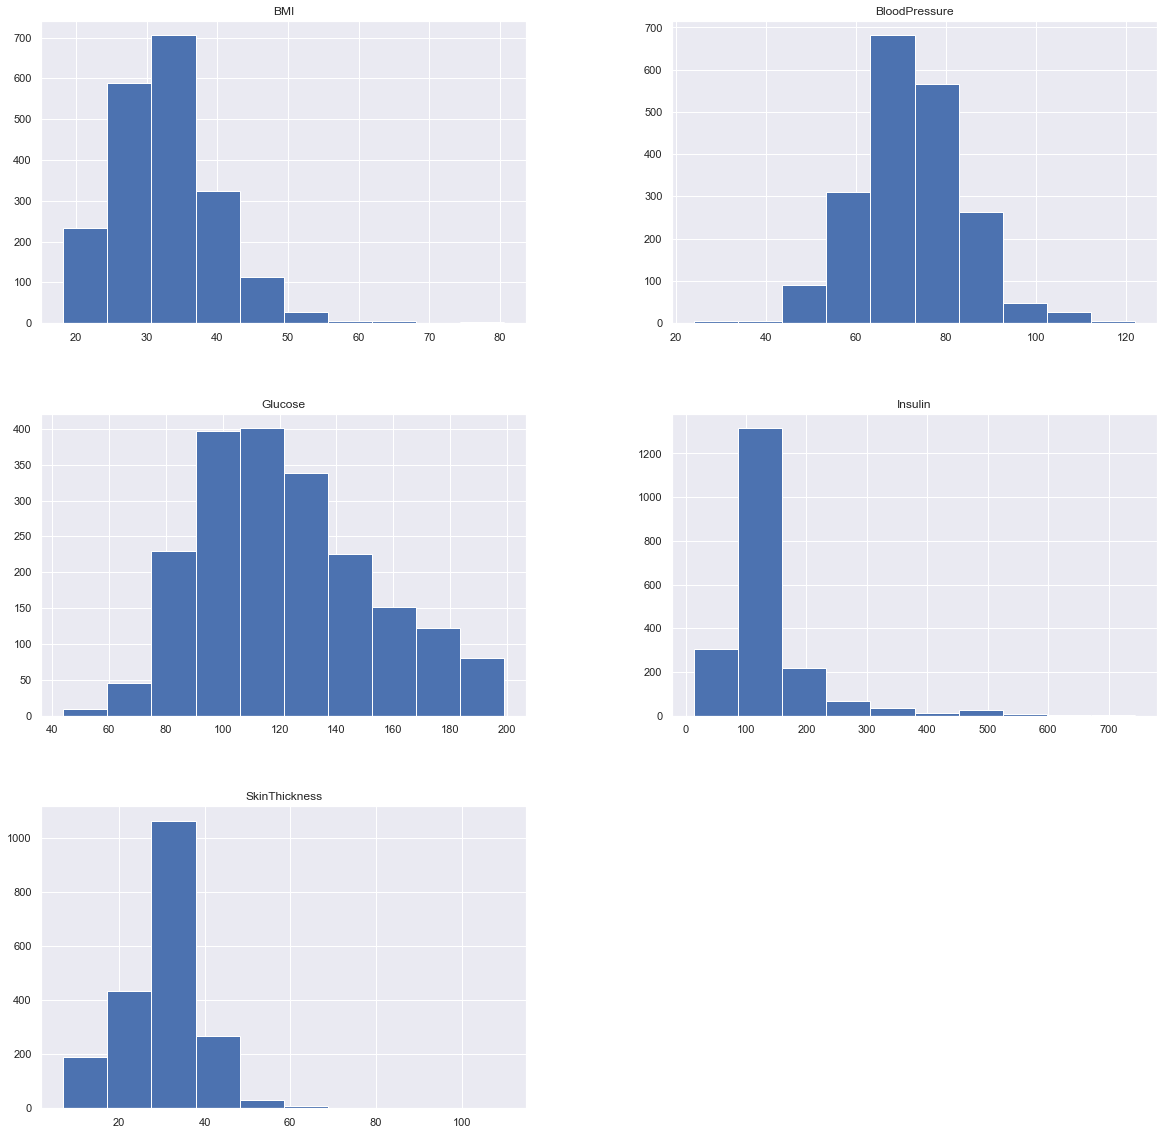

In [32]:
p = data[data_zeros].hist(figsize = (20,20))

**Pair Plot to see Distribution of all data at a time and dependencies**

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


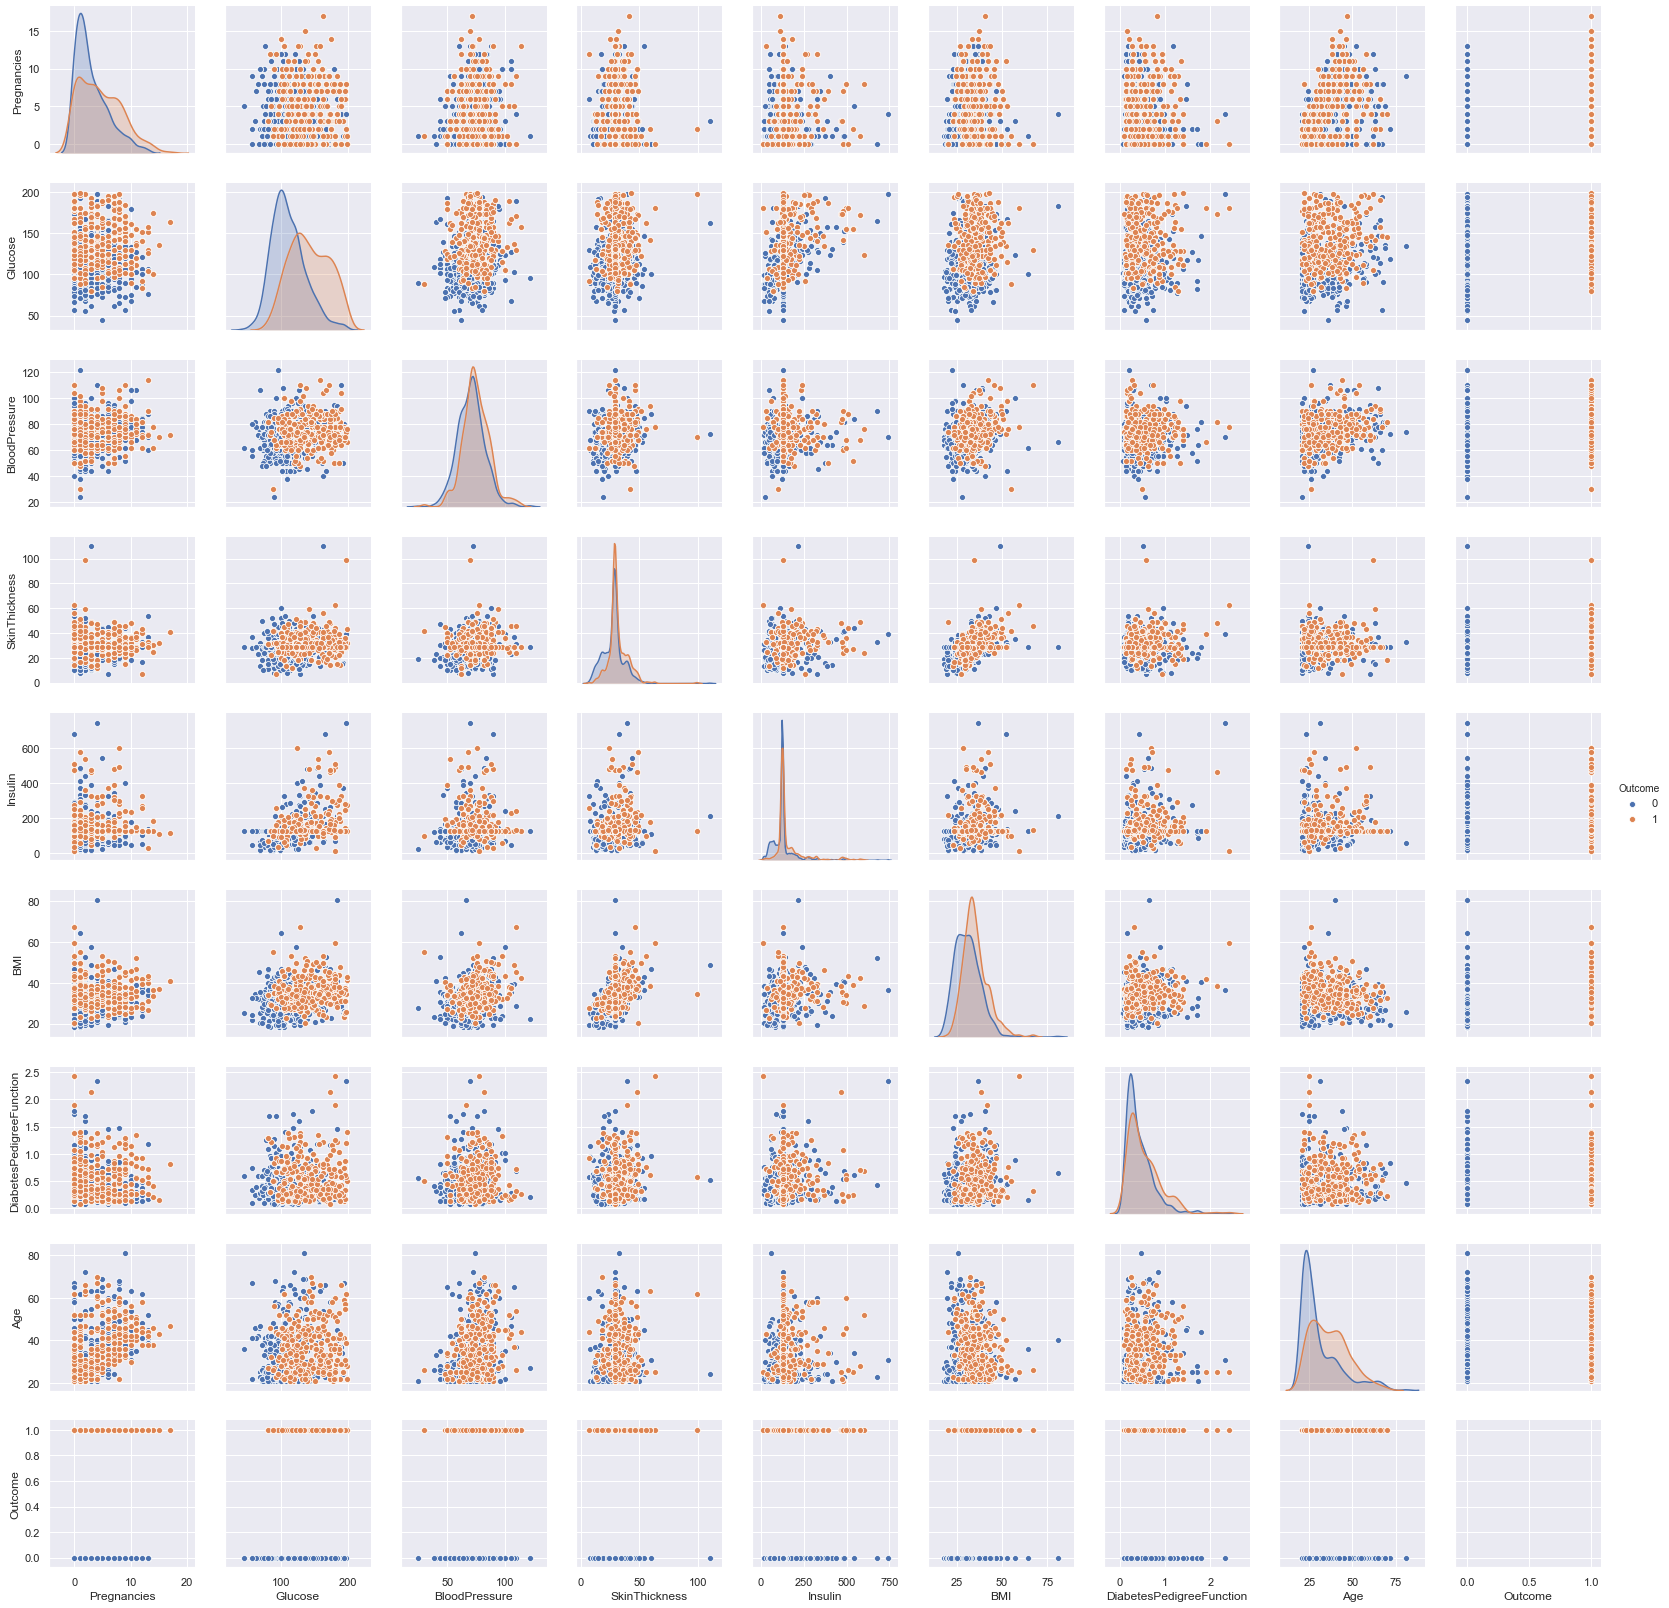

In [33]:
sns.pairplot(data =data, hue = 'Outcome')
plt.show()

#### Check the correlation

Gives Relation of different attribute with each other

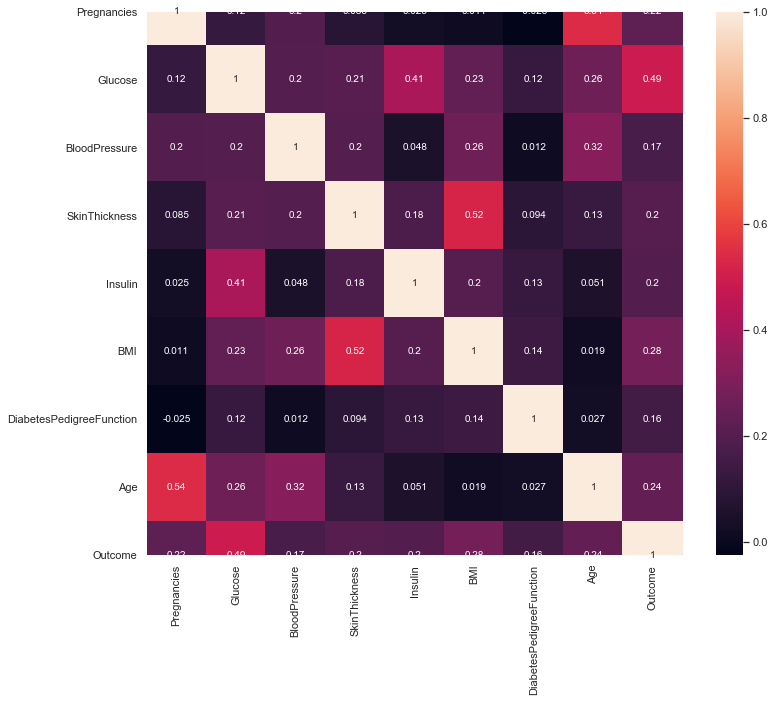

In [34]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot = True) 
plt.show()

In [35]:
corr = data.corr()
print(corr['Outcome'].sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.488020
BMI                         0.282421
Age                         0.236509
Pregnancies                 0.224437
SkinThickness               0.204668
Insulin                     0.197486
BloodPressure               0.174481
DiabetesPedigreeFunction    0.155459
Name: Outcome, dtype: float64


## Splitting data into train and test set

In [39]:
X = data.drop(columns='Outcome')
y = data['Outcome']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Fitting data in various models

In [41]:

def knn_classifier(X_train, X_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [42]:

def naive_classifier(X_train, X_test, y_train, y_test):
    
    classifier_naive = GaussianNB()
    classifier_naive.fit(X_train, y_train)

    y_pred = classifier_naive.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_naive.score(X_train, y_train)}\nTest score : {classifier_naive.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [43]:

def tree_classifier(X_train, X_test, y_train, y_test):
    
    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred = classifier_tree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [89]:

def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [46]:

def print_score(X_train, X_test, y_train, y_test):
    

    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Naive:\n")
    naive_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    tree_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)


In [90]:
print_score(X_train, X_test, y_train, y_test)

KNN:

Train score : 0.8925
Test score : 0.8025
----------------------------------------------------------------------------------------------------

Naive:

Train score : 0.7525
Test score : 0.765
----------------------------------------------------------------------------------------------------

Decision Tree:

Train score : 1.0
Test score : 0.9825
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 1.0
Test score : 0.995


In [91]:
## Performance Metrics

In [92]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[272,   0],
       [  2, 126]], dtype=int64)

In [93]:
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,272,0,272
1,2,126,128
All,274,126,400


In [94]:
##Classification Report (Accuracy, Precision, Recall, F1-score)

In [95]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       272
           1       1.00      0.98      0.99       128

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400



#Getting probability

In [97]:
y_pred_prob = classifier_forest.predict_proba(X_test)[:,1]
y_pred_prob

array([0.03, 0.  , 0.99, 0.74, 0.85, 0.07, 0.04, 0.03, 0.25, 0.  , 0.04,
       0.99, 0.02, 0.12, 0.07, 0.01, 0.06, 0.11, 0.84, 0.97, 0.85, 0.9 ,
       0.04, 0.02, 0.06, 0.58, 0.03, 0.99, 0.02, 1.  , 0.93, 0.74, 0.  ,
       0.99, 0.  , 1.  , 0.31, 0.  , 0.  , 0.3 , 0.  , 0.03, 0.96, 0.02,
       0.79, 0.29, 0.12, 0.03, 0.99, 0.85, 0.  , 0.02, 0.04, 0.9 , 0.  ,
       0.02, 0.1 , 0.09, 0.07, 0.  , 0.  , 0.04, 0.04, 0.29, 0.  , 0.04,
       0.65, 0.07, 0.93, 0.02, 0.61, 0.04, 0.02, 0.01, 0.05, 0.92, 0.05,
       0.01, 0.08, 0.05, 0.  , 0.04, 0.08, 0.93, 0.02, 0.05, 0.14, 0.33,
       0.1 , 0.72, 0.92, 0.15, 0.12, 0.71, 0.98, 0.  , 0.  , 0.04, 0.92,
       0.89, 0.  , 0.96, 0.3 , 0.09, 0.71, 0.01, 0.01, 0.06, 0.  , 0.95,
       0.94, 0.94, 0.02, 0.02, 0.03, 0.74, 0.  , 0.07, 0.97, 0.  , 0.81,
       0.  , 0.01, 0.03, 0.  , 0.07, 0.01, 0.62, 0.  , 0.  , 0.02, 0.03,
       0.  , 0.83, 0.01, 0.02, 0.08, 0.13, 0.02, 0.01, 0.03, 0.13, 0.72,
       0.03, 0.24, 0.06, 0.96, 0.  , 0.97, 0.01, 0.

**Plotting ROC Curve**

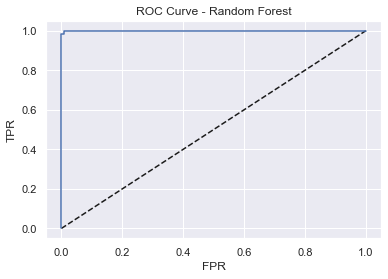

In [98]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')
plt.plot(fpr, tpr, label = "Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Random Forest")
plt.show()

**ROC Score**

In [99]:
roc_auc_score(y_test,y_pred_prob)

0.9998851102941176

---

## Hyperparameter Tunning

In [100]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_forest, X = X_train, y = y_train, cv = 10)
print(accuracies.mean(), accuracies.std())

0.9668749999999999 0.024374999999999987


In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
parameters = {
    'n_estimators': [25, 50, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 20, 25, 30]
}

In [103]:
grid_search = GridSearchCV(estimator = classifier_forest,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print('best_accuracy = ',grid_search.best_score_)
print('best_parameters = ', grid_search.best_params_)

best_accuracy =  0.9674999999999999
best_parameters =  {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 200}


In [104]:
classifier_forest = RandomForestClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 200)
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[272,   0],
       [  2, 126]], dtype=int64)

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       272
           1       1.00      0.98      0.99       128

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400



## Saving model using pickle

In [106]:
model = open('diabetes_model.pkl','rb')
forest = pickle.load(model)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [107]:
y_pred = forest.predict(X_test)

In [108]:
confusion_matrix(y_test, y_pred)

array([[267,   5],
       [  9, 119]], dtype=int64)